<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/01_Supervised_learning/14_EvaluationMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Major Evaluation Metrics in Supervised Learning



## Regression

| Metric | Definition & Used For | Formula (Basic) |
|--------|----------------------|-----------------|
| MAE (L1 Loss) | Avg. of absolute prediction errors | ∑\|y - ŷ\| / N |
| MSE (L2 Loss) | Avg. of squared prediction errors | ∑(y - ŷ)² / N |
| RMSE | Square root of MSE, in same units as output | √[∑(y - ŷ)² / N] |
| R² Score | Variance explained by model | 1 - [∑(y - ŷ)² / ∑(y - ȳ)²] |

## Binary Classification


| Metric        | Definition & Used For                                 | Formula (Basic)                                  |
|---------------|-------------------------------------------------------|--------------------------------------------------|
| Accuracy      | % of total correct predictions                        | (TP + TN) / (TP + TN + FP + FN)                  |
| Precision     | % of predicted positives that are actually correct    | TP / (TP + FP)                                   |
| Recall (TPR)  | % of actual positives correctly identified             | TP / (TP + FN)                                   |
| Specificity   | % of actual negatives correctly identified            | TN / (TN + FP)                                   |
| F1-Score      | Balance between precision and recall                  | 2 * (P * R) / (P + R)                            |
| AUC-ROC       | Rank positive cases over negative ones                | Area under TPR vs FPR curve                      |
| Log Loss      | Punishes confident wrong predictions (probabilities)  | -1/N ∑ [y*log(p) + (1−y)*log(1−p)]                |

## Multiclass Classification


| Metric           | Definition & Used For                              | Formula (Basic)                                  |
|------------------|----------------------------------------------------|--------------------------------------------------|
| Accuracy         | % of total correct predictions                     | Correct / Total                                  |
| Precision        | Class-wise (Macro/Micro/Weighted Avg)              | TP / (TP + FP) per class                         |
| Recall           | Class-wise recall per label                        | TP / (TP + FN) per class                         |
| F1-Score         | Harmonic mean of precision & recall per class      | 2 * (P * R) / (P + R) per class                  |
| Confusion Matrix | Shows per-class TP, FP, FN, TN                     | Matrix format                                    |
| Log Loss         | Punishes confident wrong predictions per class     | Same as binary, summed over classes              |


In this notebook we will focus on few classification metrics

In [55]:
from sklearn.datasets import load_wine
dataset=load_wine()

In [56]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [57]:
x=dataset['data']
y=dataset['target']

In [58]:
from sklearn.model_selection import train_test_split
xt,xtt,yt,ytt=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
knn=KNeighborsClassifier()
forest=RandomForestClassifier()

In [60]:
knn.fit(xt,yt)

KNeighborsClassifier()

In [61]:
forest.fit(xt,yt)

RandomForestClassifier()

In [62]:
knn.score(xtt,ytt) #returns mean accuracy

0.7222222222222222

In [63]:
forest.score(xtt,ytt)

1.0

## Accuracy

% of total correct predictions
```
(TP + TN) / (TP + TN + FP + FN)
```



In [64]:
y_pred_knn = knn.predict(xtt)
y_pred_forest = forest.predict(xtt)

In [65]:
acc_knn = sum(y_pred_knn == ytt) / len(y_pred_knn)
acc_forest = sum(y_pred_forest == ytt) / len(y_pred_forest)
print(acc_knn) , print (acc_forest)

0.7222222222222222
1.0


(None, None)

## Confusion Matrix
Shows per-class TP, FP, FN, TN

In [66]:
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(ytt,y_pred_knn)
cm_forest=confusion_matrix(ytt,y_pred_forest)

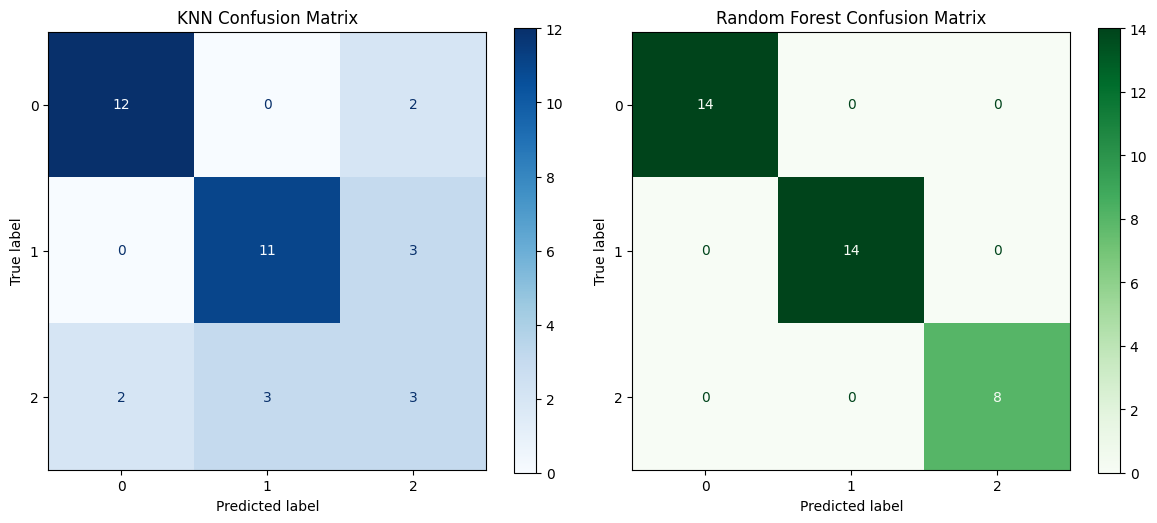

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KNN Confusion Matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(ax=axes[0], values_format='d', cmap='Blues')
axes[0].set_title("KNN Confusion Matrix")

# Random Forest Confusion Matrix
disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_forest)
disp_forest.plot(ax=axes[1], values_format='d', cmap='Greens')
axes[1].set_title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

## Other metrics
A table is provided with all formulas, using that other metrics can be calculated

In [68]:
from sklearn.metrics import classification_report
print(classification_report(ytt, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

